## Flexible models
This toolbox can handle models with fitted model parts. In this demo we will see how this is done.

First we need some imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rsatoolbox

As a first step lets generate a few random RDMs, which will serve as our data. We generate 10 RDMs for 5 conditions measured in 20 channels. We will attempt to model these RDMs with a model which takes the first two of these RDMs and is allowed to linearly weight these two. In real applications these model RDMs would of course be generated based on some model or based on some other data than the one we want to fit to.

In [2]:
data = np.random.rand(10, 5, 20)
datasets = []
for i_dat in range(data.shape[0]):
    dataset = rsatoolbox.data.Dataset(data[i_dat], descriptors={'subj':i_dat})
    datasets.append(dataset)
    
rdms = rsatoolbox.rdm.calc_rdm(datasets, method='euclidean')

model = rsatoolbox.model.ModelWeighted('testModel', rdms[[0,1]])

This model object contains the RDMs we gave it as a basis. Its primary two functions are to predict an RDM given a parameter vector $\theta$ and to fit the model, i.e. to find a parameter vector $\theta$ to approximate some data-rdms as closely as possible.

### Predicting RDMs
The model object has two different predict functions: predict and predict_rdm. 'predict' produces a vectorized form of the RDM as a numpy array, which is the minimal representation for computations. 'predict_rdm' produces a typical RDMs object containing the descriptors from the RDMs object passed originally to generate the model object.

Our model object takes 2 parameters as input, which are the two weights for the two rdms. As we see below for $\theta=[1,0]$ and $\theta=[0,1]$ it will return the original rdms, $\theta=[1,1]$ will return the sum of the rdms.

In [3]:
# first predicting only the vectors:
print('Predicting with theta = [1,0], should return the first rdm, which is:')
print(rdms[0].get_vectors())
print('The output of the model is:')
print(model.predict([1,0]))
print('Which is indeed identical')
print('')
print('Predicting with theta = [0,1], should return the second rdm, which is:')
print(rdms[1].get_vectors())
print('The output of the model is:')
print(model.predict([0,1]))
print('Which is indeed identical')
print('')
print('Predicting with theta = [1,1], should return the sum of the first two rdms, which is:')
print(rdms[0].get_vectors() + rdms[1].get_vectors())
print('The output of the model is:')
print(model.predict([1,1]))
print('Which is indeed identical')



Predicting with theta = [1,0], should return the first rdm, which is:
[[0.20529161 0.18219921 0.14234779 0.15184744 0.21434174 0.1876438
  0.23245372 0.16816806 0.11574728 0.21842971]]
The output of the model is:
[0.20529161 0.18219921 0.14234779 0.15184744 0.21434174 0.1876438
 0.23245372 0.16816806 0.11574728 0.21842971]
Which is indeed identical

Predicting with theta = [0,1], should return the second rdm, which is:
[[0.21021824 0.09930457 0.16356345 0.20092431 0.18402425 0.19685312
  0.13494642 0.13652705 0.1714637  0.12152749]]
The output of the model is:
[0.21021824 0.09930457 0.16356345 0.20092431 0.18402425 0.19685312
 0.13494642 0.13652705 0.1714637  0.12152749]
Which is indeed identical

Predicting with theta = [1,1], should return the sum of the first two rdms, which is:
[[0.41550985 0.28150378 0.30591124 0.35277176 0.39836599 0.38449692
  0.36740013 0.3046951  0.28721099 0.3399572 ]]
The output of the model is:
[0.41550985 0.28150378 0.30591124 0.35277176 0.39836599 0.38449

In [4]:
# Predicting full rdm objects works the same. Here this illustrated only for the [1,0] case:
print('Predicting with theta = [1,0], should return the first rdm, which is:')
print(rdms[0])
print('The output of the model is:')
print(model.predict_rdm([1,0]))
print('Which is the same RDM, but lost the rdm_descriptors as it is now formally a combination of the models RDMs')


Predicting with theta = [1,0], should return the first rdm, which is:
rsatoolbox.rdm.RDMs
1 RDM(s) over 5 conditions

dissimilarity_measure = 
squared euclidean

dissimilarities[0] = 
[[0.         0.20529161 0.18219921 0.14234779 0.15184744]
 [0.20529161 0.         0.21434174 0.1876438  0.23245372]
 [0.18219921 0.21434174 0.         0.16816806 0.11574728]
 [0.14234779 0.1876438  0.16816806 0.         0.21842971]
 [0.15184744 0.23245372 0.11574728 0.21842971 0.        ]]

descriptors: 

rdm_descriptors: 
subj = [0]
index = [0]

pattern_descriptors: 
index = [0, 1, 2, 3, 4]
pattern = [0 1 2 3 4]


The output of the model is:
rsatoolbox.rdm.RDMs
1 RDM(s) over 5 conditions

dissimilarity_measure = 
squared euclidean

dissimilarities[0] = 
[[0.         0.20529161 0.18219921 0.14234779 0.15184744]
 [0.20529161 0.         0.21434174 0.1876438  0.23245372]
 [0.18219921 0.21434174 0.         0.16816806 0.11574728]
 [0.14234779 0.1876438  0.16816806 0.         0.21842971]
 [0.15184744 0.23245372

### Fitting data
To fit data with our model, we use the fitting functions also provided in rsatoolbox.Model. These functions take a model
and some data rdms as input and return an optimal theta value. For a weighted sum model as we created here there are a couple of different fitting algorithms available. Let's try them out:

In [5]:
# Let's start with a general optimisation function:
theta_opt = rsatoolbox.model.fit_optimize(model, rdms)
print('Theta based on optimization:')
print(theta_opt)

# As we are dealing with a linear weighting model, we can achieve the same fit using 
# fit_regress, which uses the linear algebra solution to the fitting problem,
# which will usually be much faster
theta_regress = rsatoolbox.model.fit_regress(model, rdms)
print('Theta based on fit_regress:')
print(theta_regress)


Theta based on optimization:
[0.54167376 0.8405888 ]
Theta based on fit_regress:
[0.54166958 0.8405915 ]


These parameter values are always quite similar, but not identical due to inaccuracy of the optimization.
We can use these parameter values and see that the parameter values we found indeed produce very similar rdms:

(<Figure size 144x144 with 1 Axes>,
 array([[<AxesSubplot:>]], dtype=object),
 defaultdict(dict,
             {<AxesSubplot:>: {'image': <matplotlib.image.AxesImage at 0x7fba190f22e0>}}))

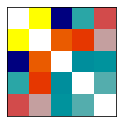

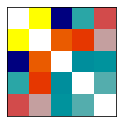

In [6]:
# get rdm prediction with the fitted parameters:
rdm_opt = model.predict_rdm(theta_opt)
rdm_regress = model.predict_rdm(theta_opt)
# show rdms:
rsatoolbox.vis.show_rdm(rdm_opt)
rsatoolbox.vis.show_rdm(rdm_regress)

The model object also has a default fitter attached, which allows us to fit the model using model.fit(data)

In [7]:
theta_model = model.fit(rdms)
print(theta_model)
print('the used fitting function was:')
print(model.default_fitter)

[0.54171328 0.84056334]
the used fitting function was:
<function fit_optimize at 0x7fba18bdb9d0>


In this case the default fitting function (`model.default_fitter`) is `fit_optimize`, such that the call we just performed results in exactly the same computations as `rsatoolbox.model.fit_optimize(model, rdms)` did above.

### Optimization criterion
The most important additional input the fitting functions take is `method`, which specifies which comparison method between RDMs is optimized. So far we left this at the default which is the cosine similarity. If we want to optimize a different measure, like the correlation we only need to pass the name:

In [8]:
# to maximize the correlation instead we can use either of the following:
theta_corr_regress = rsatoolbox.model.fit_regress(model, rdms, method='corr')
print(theta_corr_regress)
theta_corr_opt = rsatoolbox.model.fit_optimize(model, rdms, method='corr')
print(theta_corr_opt)
theta_corr_model = model.fit(rdms, method='corr')
print(theta_corr_model)

[-0.04123096  0.99914964]
[-0.04123086  0.99914965]
[-0.04122998  0.99914968]


Note that these values are very similar to each other, but differ from the ones we got above when optimizing the cosine similarity.

As we now know, what criterion was optimized we can also evaluate this criterion to check that the found parameters are indeed better than others. For example, the parameters found to optimize the correlation should yield a higher average correlation to the data rdms, but a lower cosine similarity than the parameters optimized for the cosine similarity.

In [9]:
rdm_cosine = model.predict_rdm(theta_regress)
rdm_corr = model.predict_rdm(theta_corr_regress)
print('The average correlation for the correlation parameters is:')
print(np.mean(rsatoolbox.rdm.compare(rdm_corr, rdms, 'corr')))
print('The average correlation for the cosine similarity parameters is:')
print(np.mean(rsatoolbox.rdm.compare(rdm_cosine, rdms, 'corr')))
print('The average cosine similarity for the correlation parameters is:')
print(np.mean(rsatoolbox.rdm.compare(rdm_corr, rdms, 'cosine')))
print('The average cosine similarity for the cosine similarity parameters is:')
print(np.mean(rsatoolbox.rdm.compare(rdm_cosine, rdms, 'cosine')))

The average correlation for the correlation parameters is:
0.20919570220266936
The average correlation for the cosine similarity parameters is:
0.1648685520549055
The average cosine similarity for the correlation parameters is:
0.9609090694876308
The average cosine similarity for the cosine similarity parameters is:
0.9712386973494105


## Crossvalidation

## Bootstrap-wrapped crossvalidation

## Other model types